# Привет!

Добро пожаловать на курс "Практикум по математической статистике".

Ниже мы вспомним некоторые приемы визуализации данных, и обсудим, какой график красивый, а какой нет.

In [1]:
import numpy as np
from scipy import stats as sps
from matplotlib import pyplot as plt
import seaborn as sns

Старайтесь, чтобы ваш код был **воспроизводимым**. Для этого, как правило, достаточно добавить эту строку, и перед отправкой нажать `restart and run all`.

In [2]:
np.random.seed(42)

Всегда старайтесь фиксировать магические константы и заводить переменные написаные КАПСОМ.

In [3]:
SAMPLE_SIZE=400
SAMPLE_NUM=100

Для начала, давайте сгенерируем несколько выборок из стандартного распределения и несколько из $\mathit{N}(0.2, 1)$ и посмотрим как ведет себя их среднее. Будем использовать только **векторную** арифметику.

In [4]:
samples = sps.norm().rvs((SAMPLE_NUM, SAMPLE_SIZE))
mask = sps.bernoulli(0.5).rvs(SAMPLE_NUM).astype(bool)
samples[mask] += 0.2
means = np.cumsum(samples, axis=1) / (np.arange(SAMPLE_SIZE)+1)

Давайте попробуем построить график этой велиичины для всех выборок.

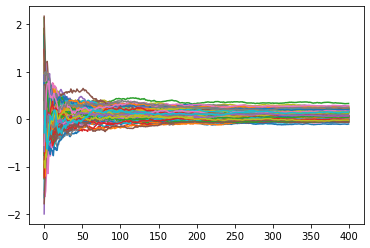

In [5]:
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean)

ValueError: x and y must have same first dimension, but have shapes (400,) and (100, 400)

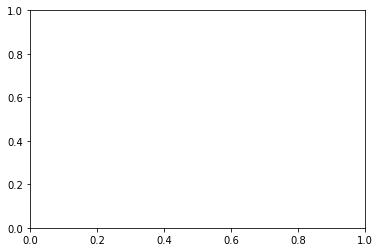

In [7]:
plt.plot(range(SAMPLE_SIZE), means)

Я думаю всем ясно, что такой график хорошим не назовешь. Попробуем еще раз!

Text(0, 0.5, '$\\overline{X}$')

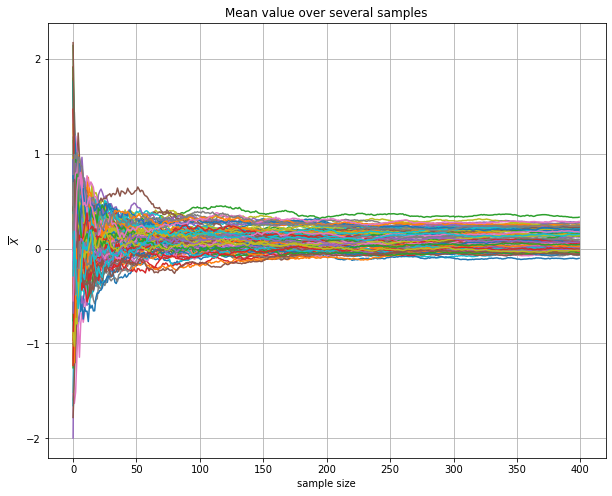

In [6]:
plt.figure(figsize=(10,8))
plt.title("Mean value over several samples")
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean)
plt.hlines(y=0, xmin=0, xmax=SAMPLE_SIZE, color="r")
plt.grid()
plt.xlabel("sample size")
plt.ylabel(r"$\overline{X}$")

Стало лучше, но разница между двумя группами линий не различима, также у нас сверху появилась уродливая надпись `Text(0, 0.5, '$\\overline{X}$')`.
Чтобы ее убрать достаточно в конец добавить `plt.plot()`.
Давайте сделаем линии полупрозрачными `alpha=0.57` и добавим серый фон `sns.set_style("darkgrid")`. Не стесняйтесь использовать шрифты большего размера, предавая аргумент `fontsize`. Или можете передать аргумент `font_scale` в `sns.set`.

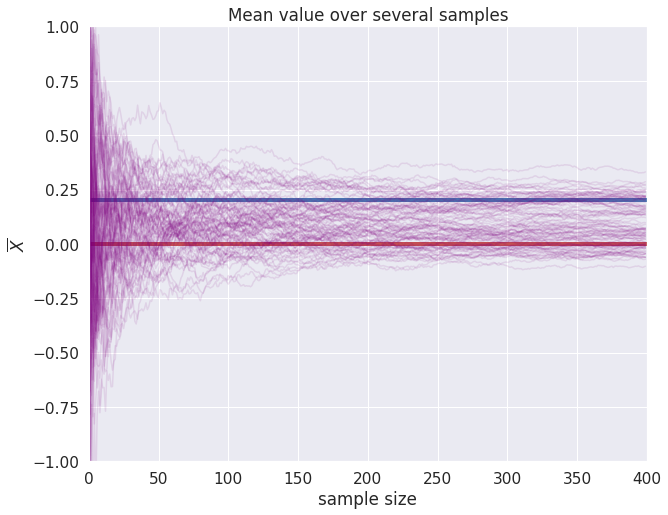

In [7]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(10,8))
plt.title("Mean value over several samples")
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean, alpha=0.1, color="purple")
plt.hlines(y=0, xmin=0, xmax=SAMPLE_SIZE, color="r", linewidth=4)
plt.hlines(y=0.2, xmin=0, xmax=SAMPLE_SIZE, color="b", linewidth=4)
plt.xlim(0, SAMPLE_SIZE)
plt.ylim(-1, 1)
plt.xlabel("sample size")
plt.ylabel(r"$\overline{X}$")
plt.show()

### Белые против серых

Для графиков с линиями без закрашенных площадей принято использовать серый фон. Если же график содержит закрашенную площадь, то принято использовать белый фон для лучшего контраста.

Например далее мы можем видеть пример графика с белым фоном, так как *доверительый интервал* закрашен в красный цвет.

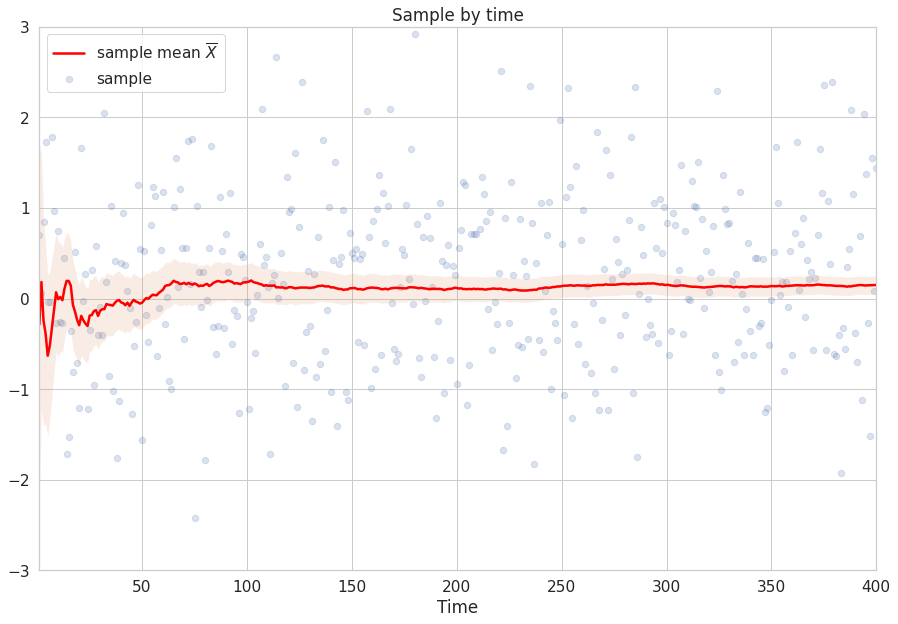

In [8]:
sns.set_style("whitegrid")

sample = samples[0]
time = np.arange(SAMPLE_SIZE) + 1
plt.figure(figsize=(15, 10))
plt.scatter(time, sample, alpha=0.2, s=40, label='sample')
plt.plot(
    time, 
    mean, 
    color='red', 
    linewidth=2.5, 
    label='sample mean $\overline{X}$'
) 
plt.fill_between(
    x=time, 
    y1=mean + 2 / np.sqrt(time),
    y2=mean - 2 / np.sqrt(time),
    alpha=0.15
)
plt.legend()
plt.xlim((1, SAMPLE_SIZE))
plt.ylim((-3, 3))
plt.xlabel('Time')
plt.title('Sample by time')
plt.savefig('example.png')
plt.show()

# Анализ распределения от различных факторов

Давайте посмотрим на, пожалуй, самый популярный датасет для анализа данных. Посмотрим на длину лепестка в зависимости от вида.

In [9]:
df = sns.load_dataset("iris")

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
c_map = dict(zip(df["species"].unique(), np.arange(3)))
df["color"] = df["species"].apply(
    lambda x: c_map[x]
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Scatterplot

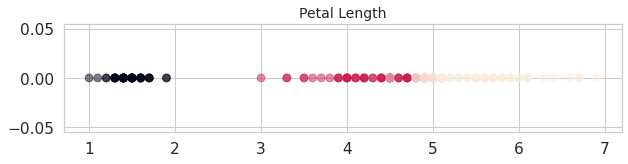

In [12]:

plt.figure(figsize=(10, 2))
plt.title("Petal Length", fontsize=14)
plt.scatter(
    df["petal_length"], [0]*df.shape[0], s=60, c=df["color"], alpha=0.5
)
plt.show()

Кажется делать scatterplot на одном графике плохая идея в этом случае

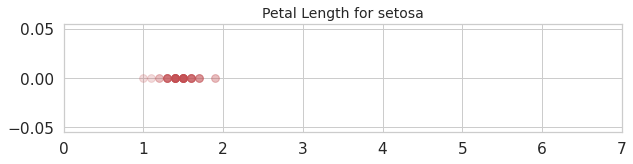

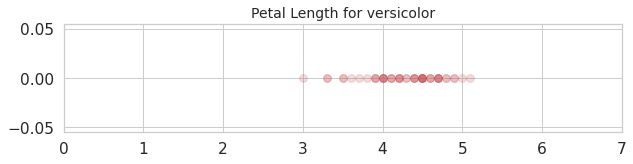

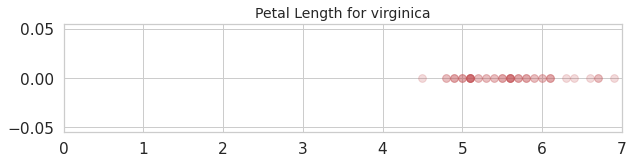

In [13]:
for sp in c_map.keys():
    current_df = df[df["species"] == sp]
    plt.figure(figsize=(10, 2))
    plt.title(f"Petal Length for {sp}", fontsize=14)
    plt.scatter(
        x=current_df["petal_length"], 
        y=[0]*current_df.shape[0], 
        s=60, 
        c="r",
        alpha=0.2
    )
    plt.xlim(0, 7)
    plt.show()

Так намного лучше, но давайте вспомним и другие способы визуализации распределения по классам.

## Boxplot

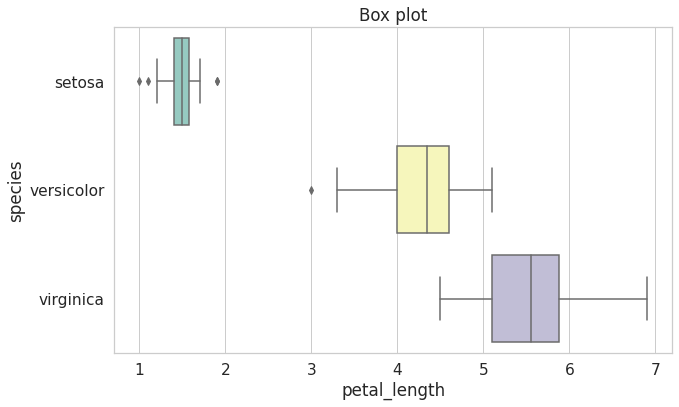

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Box plot")
sns.boxplot(x=df["petal_length"], y=df["species"], palette='Set3')
plt.show()

## Violin plot

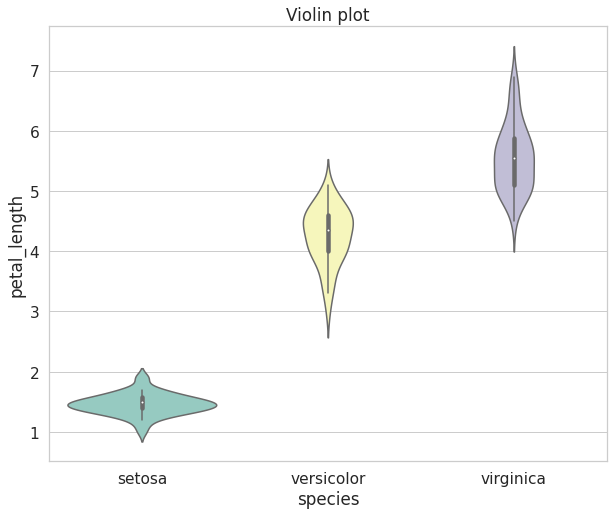

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Violin plot")
sns.violinplot(x=df["species"], y=df["petal_length"], palette='Set3')
plt.show()

# Визуализация плотности

### Scatter plot

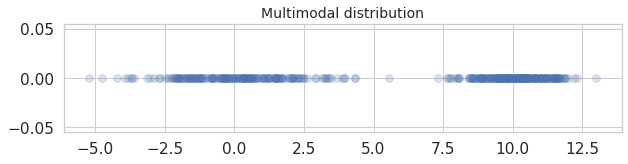

In [16]:
mask = sps.bernoulli(0.5).rvs(SAMPLE_SIZE).astype(bool)
sample_1 = sps.norm(0, 2).rvs(SAMPLE_SIZE)
sample_1[mask] = 0
sample_2 = sps.norm(10, 1).rvs(SAMPLE_SIZE)
sample_2[~mask] = 0
sample = sample_1 + sample_2
plt.figure(figsize=(10, 2))
plt.title("Multimodal distribution", fontsize=14)
plt.scatter(
    sample, [0]*len(sample), s=60, alpha=0.2
)
plt.show()

### Histogram

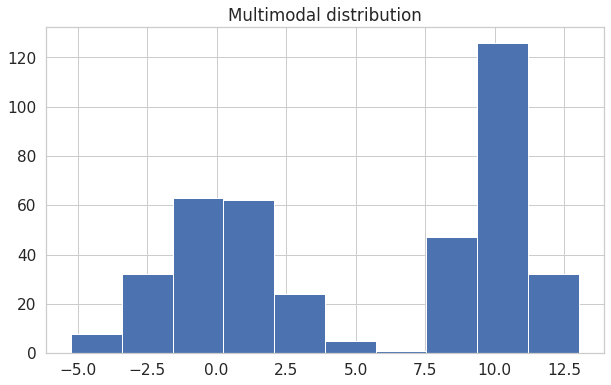

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
plt.hist(
    sample
)
plt.show()

### KDE

Небольшое замечание по поводе KDE. **Не используйте KDE для данных из дискретного распределения**. Вы получите что-то необъяснимое с точки зрения статистики.

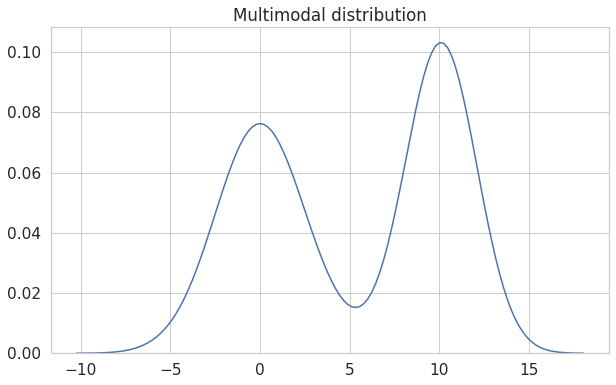

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
sns.kdeplot(sample)
plt.show()

### Distplot

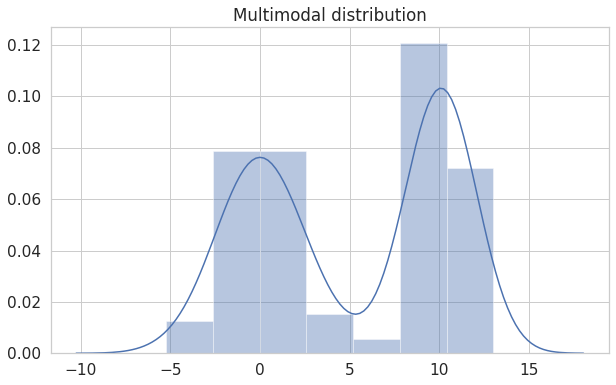

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
sns.distplot(sample)
plt.show()

## Двумерный случай

Для двумерного случая KDE plot будет иметь размерность 3. Однако мы можем воспользоваться линиями уровня и разными уровнями насыщенности.

In [20]:
geyser = sns.load_dataset("geyser")
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


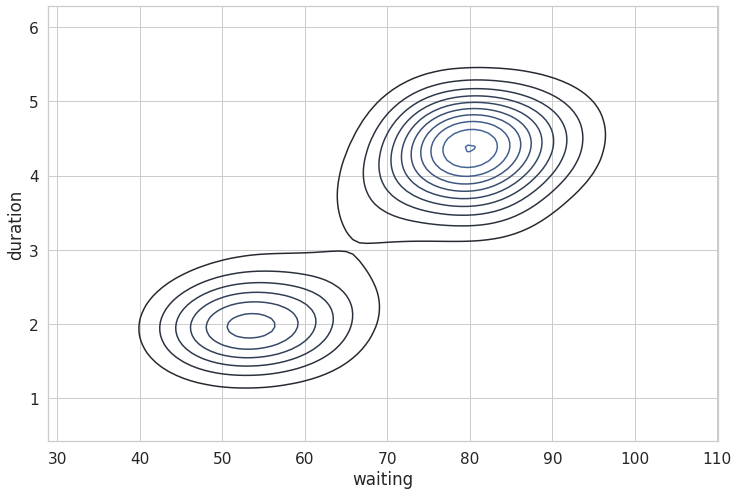

In [21]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=geyser[["waiting", "duration"]]
)
plt.xlabel("waiting")
plt.ylabel("duration")
plt.show()

Желаем удачи!

Команда курса.

